<a href="https://colab.research.google.com/github/Abhishek0697/How-to-build-a-Convolutional-Neural-Network-from-scratch-using-tf.keras-for-Image-Classification/blob/main/Keras_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Convolutional Neural Networks from scratch using tf.keras for Image Classification**

### In this tutorial, we will build a Convolutional Neural Network from scratch using tf.keras and then later explore and integrate the Data Augmentation Techniques provided by Keras.

### [**tf.keras**](https://www.tensorflow.org/api_docs/python/tf/keras) is the TensorFlow's implementation of Keras. It is a high-level API in TensorFlow.


### We will use the [**CIFAR-10**](https://www.cs.toronto.edu/~kriz/cifar.html) dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.



### *Lets Begin....*

In [39]:
'''
Necessary Imports
'''
import numpy as np
from tensorflow.keras import *
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''
Download CIFAR-10 Dataset 
'''
(X, y), (test_X, test_y) = datasets.cifar10.load_data()

170500096/170498071 [==============================] - 3s 0us/step


In [3]:
'''
Out of the 50000 images available for training, we will create a validation set of 3000 images and use 47000 images for training
'''

train_X = X[:47000]
train_y = y[:47000]

val_X = X[-3000:]
val_y = y[-3000:]

### Let peek into our Images!

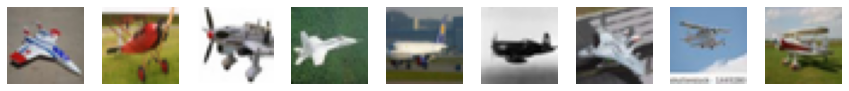

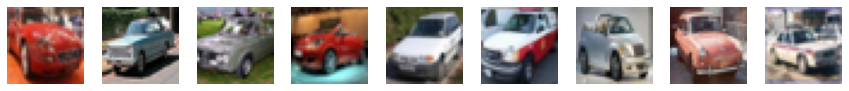

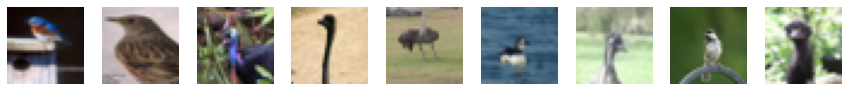

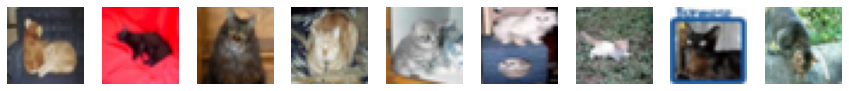

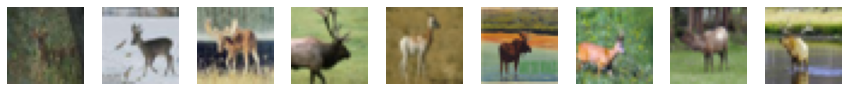

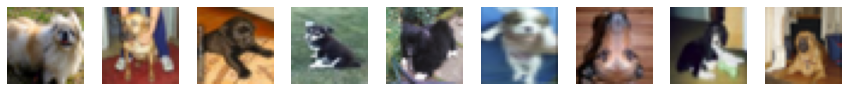

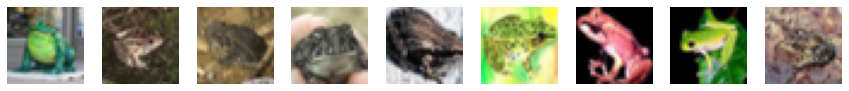

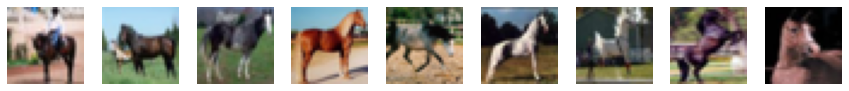

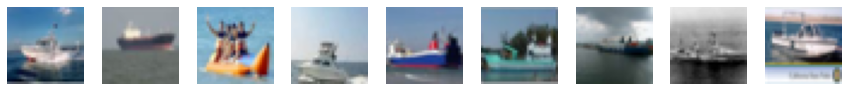

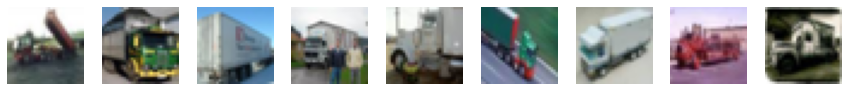

In [133]:
for class_number in range(10):

  plt.figure(figsize=(15,15))
  indices = np.where(train_y[:200].flatten()==class_number)[0]
  for i, imageid in enumerate(indices[1:10]):
    
      plt.subplot(990 + 1 + i)    
      plt.imshow(train_X[imageid])
      plt.axis('off')

  plt.show()

In [4]:
'''
Check the size of Dataset and Image Dimensions
'''
print("Train Images : {}\nTrain labels : {}\nVal Images   : {}\nVal labels   : {}\nTest Images  : {}\nTest Labels  : {}\n".format(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape))

Train Images : (47000, 32, 32, 3)
Train labels : (47000, 1)
Val Images   : (3000, 32, 32, 3)
Val labels   : (3000, 1)
Test Images  : (10000, 32, 32, 3)
Test Labels  : (10000, 1)



**Model Architecture - (Conv2D &rarr; BatchNorm &rarr; Conv2D &rarr; BatchNorm &rarr; Maxpooling2D)*
3 &rarr; (Dense->BatchNorm)*3 &rarr; Softmax**

- Optimizer = Adam
- Loss = SparseCategoricalCrossEntropy
- Batch Size = 64
- Epochs = 30
- Test Accuracy = 81.59% without Data Augmentation
- Test Accuracy = 88.32% with Data Augmentation



*We will use the TensorFlow Functional API since gives us more control and access to each layers compared to Sequential API.*

In [144]:
input = Input(shape=(32, 32, 3))

x = layers.Conv2D(32, (3,3), activation='relu',padding='same')(input)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(64, (3,3), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Conv2D(128, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(256, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)

x = layers.Conv2D(512, (3,3), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.Conv2D(512, (5,5), activation='relu',padding='same')(x)
x = layers.BatchNormalization()(x)
x = layers.MaxPooling2D(2)(x)

x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dense(128, activation='relu')(x)
x= layers.Dense(10)(x)
output= activations.softmax(x)

model = Model(inputs=input, outputs=output,name="TF_Functional_API")
model.summary()

Model: "TF_Functional_API"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_64 (Batc (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_65 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_50 (Conv2D)           (None, 16, 16, 128) 

### **Approach 1 - Running our model without using Data Augmentation**

The three basic functions in keras for model training and evaluation are-
- compile
- fit
- evaluate  

TensorFlow provides a comprehensive guide for each of the above methods. [Read here](https://www.tensorflow.org/api_docs/python/tf/keras/Model#methods_2)

In [145]:
model.compile(loss=losses.SparseCategoricalCrossentropy(),optimizer=optimizers.Adam(),metrics=['accuracy'])

history = model.fit(train_X, train_y.flatten(), batch_size=64, epochs=30,validation_data=(val_X,val_y.flatten()))

model.evaluate(test_X, test_y.flatten(), verbose=2)

Epoch 1/30
735/735 [==============================] - 59s 79ms/step - loss: 1.7146 - accuracy: 0.4070 - val_loss: 1.6875 - val_accuracy: 0.4980
Epoch 2/30
735/735 [==============================] - 57s 78ms/step - loss: 0.8831 - accuracy: 0.6905 - val_loss: 0.7548 - val_accuracy: 0.7333
Epoch 3/30
735/735 [==============================] - 57s 77ms/step - loss: 0.6470 - accuracy: 0.7740 - val_loss: 0.7541 - val_accuracy: 0.7397
Epoch 4/30
735/735 [==============================] - 57s 77ms/step - loss: 0.4994 - accuracy: 0.8265 - val_loss: 0.6266 - val_accuracy: 0.7957
Epoch 5/30
735/735 [==============================] - 57s 77ms/step - loss: 0.4039 - accuracy: 0.8625 - val_loss: 0.6091 - val_accuracy: 0.7997
Epoch 6/30
735/735 [==============================] - 56s 77ms/step - loss: 0.2960 - accuracy: 0.8987 - val_loss: 0.6928 - val_accuracy: 0.7853
Epoch 7/30
735/735 [==============================] - 56s 76ms/step - loss: 0.2234 - accuracy: 0.9221 - val_loss: 0.6719 - val_accuracy:

[0.9291368126869202, 0.8159000277519226]

We achieve a Test Accuracy of **81.59%**

### **Approach 2 - Data Augmentation using ImageDataGenerator class**


Now, we will see how using Data Augmentation techniques can boost the accuracy of our model.

We will use the **ImageDataGenerator** class. It provides a range of transformation which we can incorporate easily into our training.

[Documentation](https://keras.io/api/preprocessing/image/)

In [128]:
datagen_train = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)


datagen_test = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True)

datagen_train.fit(train_X)
datagen_test.fit(val_X)
datagen_test.fit(test_X)



'''
  Train and evaluate
'''
model.compile(loss=losses.SparseCategoricalCrossentropy(),optimizer=optimizers.Adam(),metrics=['accuracy'])

history_dataaug = model.fit(datagen_train.flow(train_X, train_y.flatten(), batch_size=64), steps_per_epoch=len(train_X) / 64, epochs=30, validation_data=datagen_test.flow(val_X, val_y.flatten(), batch_size=64))

model.evaluate(datagen_test.flow(test_X, test_y.flatten(), batch_size=1), verbose=2)

Epoch 1/30
734/734 [==============================] - 60s 80ms/step - loss: 1.8762 - accuracy: 0.3377 - val_loss: 1.3327 - val_accuracy: 0.5660
Epoch 2/30
734/734 [==============================] - 57s 78ms/step - loss: 1.2514 - accuracy: 0.5559 - val_loss: 1.4214 - val_accuracy: 0.5743
Epoch 3/30
734/734 [==============================] - 57s 78ms/step - loss: 1.0071 - accuracy: 0.6422 - val_loss: 0.8631 - val_accuracy: 0.7083
Epoch 4/30
734/734 [==============================] - 57s 78ms/step - loss: 0.8719 - accuracy: 0.6960 - val_loss: 0.8312 - val_accuracy: 0.7210
Epoch 5/30
734/734 [==============================] - 57s 78ms/step - loss: 0.7738 - accuracy: 0.7332 - val_loss: 0.7590 - val_accuracy: 0.7487
Epoch 6/30
734/734 [==============================] - 57s 78ms/step - loss: 0.6990 - accuracy: 0.7597 - val_loss: 0.6426 - val_accuracy: 0.7880
Epoch 7/30
734/734 [==============================] - 57s 78ms/step - loss: 0.6375 - accuracy: 0.7813 - val_loss: 0.5629 - val_accuracy:

[0.391483336687088, 0.8831999897956848]

The Test Accuracy is improved to **88.32%**

### Now, Lets Visualize Loss and Accuracy plots using Matplotlib

In [129]:
def plot_loss(epochs, train_loss, v_loss, title):
    plt.figure(figsize=(8,8))
    x = np.arange(1,epochs+1)
    plt.plot(x, train_loss, label = 'Training Loss')
    plt.plot(x, v_loss, label = 'Validation Loss')
    plt.xlabel('Epochs', fontsize =16)
    plt.ylabel('Loss', fontsize =16)
    plt.title(title,fontsize =16)
    plt.legend(fontsize=16)
    
    
def plot_acc(epochs,v_acc_model1, v_acc_model2, title):
    plt.figure(figsize=(8,8))
    x = np.arange(1,epochs+1)
    plt.plot(x, v_acc_model1, label = 'No Data Augmentation')
    plt.plot(x, v_acc_model2, label = 'With Data Augmentation')
    plt.xlabel('Epochs', fontsize =16)
    plt.ylabel('Accuracy', fontsize =16)
    plt.title(title, fontsize =16)
    plt.legend(fontsize=16)

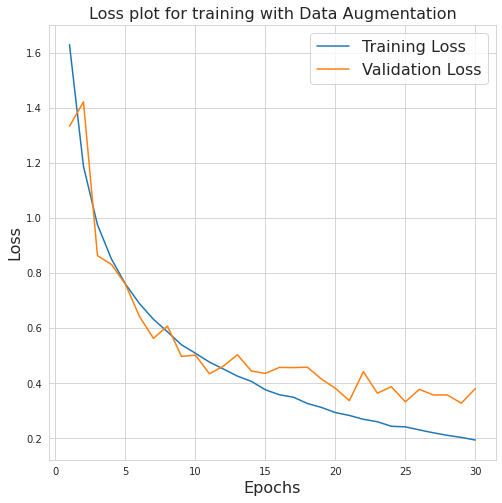

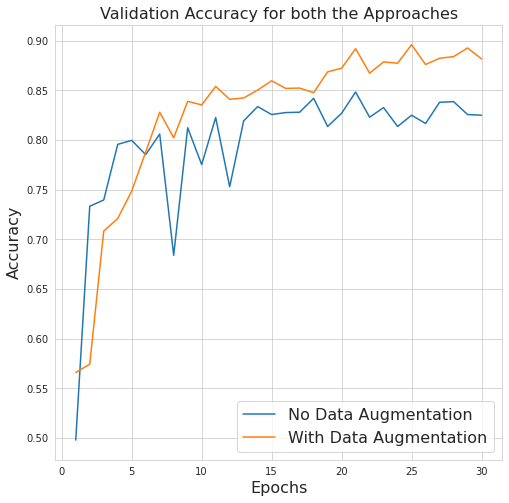

In [146]:
sns.set_style("whitegrid")
plot_loss(30, history_dataaug.history['loss'], history_dataaug.history['val_loss'], title = 'Loss plot for training with Data Augmentation')
plot_acc(30, history.history['val_accuracy'], history_dataaug.history['val_accuracy'], title = 'Validation Accuracy for both the Approaches')